Shape: (8, 4)
Missing values:
 CustomerID        0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicates: 0
Data Types:
 CustomerID        int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Summary Statistics:
        CustomerID        Age  Annual Income  Spending Score
count     8.00000   8.000000       8.000000        8.000000
mean      4.50000  24.250000   18500.000000       52.375000
std       2.44949   5.675763    2449.489743       34.537505
min       1.00000  19.000000   15000.000000        6.000000
25%       2.75000  20.750000   16750.000000       30.750000
50%       4.50000  22.500000   18500.000000       58.000000
75%       6.25000  25.000000   20250.000000       78.000000
max       8.00000  35.000000   22000.000000       94.000000


C:\Users\harsh\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is k

Skipped Cluster 9,not enough data points.
Skipped Cluster 10,not enough data points.


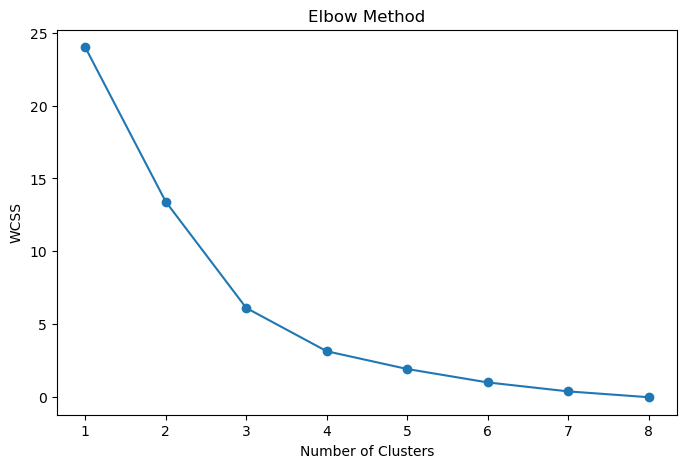

C:\Users\harsh\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


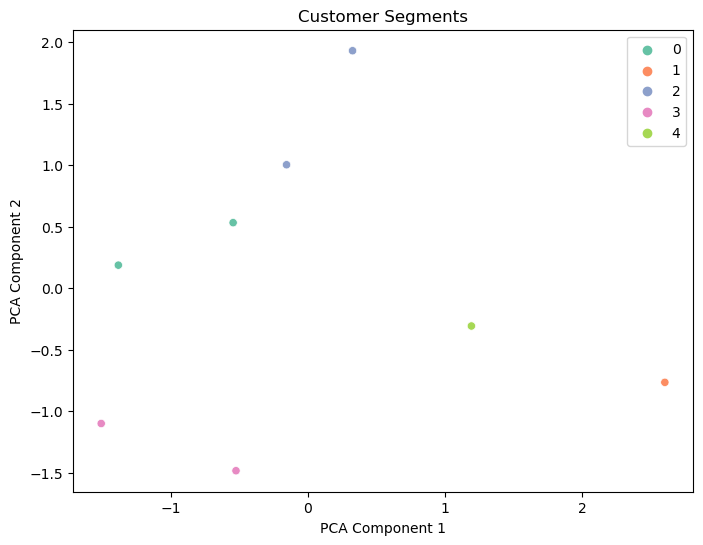


Cluster 0 - Size: 2
Age                  22.0
Annual Income     17000.0
Spending Score       79.0
dtype: float64

Cluster 1 - Size: 1
Age                  35.0
Annual Income     21000.0
Spending Score        6.0
dtype: float64

Cluster 2 - Size: 2
Age                  22.5
Annual Income     21000.0
Spending Score       85.0
dtype: float64

Cluster 3 - Size: 2
Age                  19.5
Annual Income     16000.0
Spending Score       22.5
dtype: float64

Cluster 4 - Size: 1
Age                  31.0
Annual Income     19000.0
Spending Score       40.0
dtype: float64


In [18]:
# Task 3: Customer Segmentation Using Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Load the Dataset
data = pd.read_csv("customer_data.csv")

# Basic inspection
print("Shape:", data.shape)
print("Missing values:\n", data.isnull().sum())
print("Duplicates:", data.duplicated().sum())
print("Data Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())

# 2. Data Preprocessing
# Selecting relevant features
features = data[['Age', 'Annual Income', 'Spending Score']]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# 3. Determine the Optimal Number of Clusters using Elbow Method
wcss = []
for i in range(1, 11):
    if scaled_data.shape[0]>=i:
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)
    else:
        print(f"Skipped Cluster {i},not enough data points.")

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(wcss)+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 4. Apply KMeans Clustering
optimal_clusters = 5  # Change this based on your elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# 5. Visualization using PCA (2D Scatter Plot)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Save the clustered dataset
data.to_csv("clustered_customer_data.csv", index=False)

# 6. Basic Recommendations (example printout)
for i in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i} - Size: {len(cluster_data)}")
    print(cluster_data[['Age', 'Annual Income', 'Spending Score']].mean())